<a href="https://colab.research.google.com/github/debojit11070/deep-learning/blob/main/Action_Detection_using_mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install mediapipe

In [51]:
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from google.colab.patches import cv2_imshow
# import cv2
# import numpy as np
# import base64
# import mediapipe as mp

# # Mediapipe setup
# mp_holistic = mp.solutions.holistic
# mp_drawing = mp.solutions.drawing_utils

# # Function to capture webcam feed in Colab
# def take_photo(filename='photo.jpg', quality=0.8):
#     js = Javascript('''
#         async function captureImage() {
#             const video = document.createElement('video');
#             const canvas = document.createElement('canvas');
#             const context = canvas.getContext('2d');
#             const stream = await navigator.mediaDevices.getUserMedia({video: true});

#             document.body.appendChild(video);
#             video.style.display = 'none';
#             canvas.style.display = 'none';
#             video.srcObject = stream;
#             await video.play();

#             canvas.width = video.videoWidth;
#             canvas.height = video.videoHeight;
#             context.drawImage(video, 0, 0, canvas.width, canvas.height);

#             stream.getTracks().forEach(track => track.stop());
#             const data = canvas.toDataURL('image/jpeg', {quality: %f});
#             return data;
#         }
#         captureImage();
#     ''' % quality)
#     display(js)
#     data = eval_js('captureImage()')
#     if not data:
#         print("Error: No data captured!")
#         return None

#     # Decode base64 string using base64 library
#     header, encoded = data.split(',', 1)
#     print(f"Base64 header: {header}")
#     binary = base64.b64decode(encoded)

#     # Decode image using OpenCV
#     img = cv2.imdecode(np.frombuffer(binary, np.uint8), cv2.IMREAD_COLOR)
#     if img is None or img.size == 0:
#         print("Error: Decoded image is empty!")
#         return None

#     # Save image to file
#     success = cv2.imwrite(filename, img)
#     if not success:
#         print("Error: Failed to save image!")
#         return None

#     return img

# # Function to perform Mediapipe detection
# def mediapipe_detection(image, model):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
#     image.flags.writeable = False                   # Image is no longer writeable
#     results = model.process(image)                  # Make prediction
#     image.flags.writeable = True                    # Image is now writeable
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
#     return image, results

# # Function to draw landmarks on the image
# def draw_styled_landmarks(image, results):
#     # Draw face landmarks
#     if results.face_landmarks:
#         mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,
#                                   mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                                   mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
#     # Draw left hand landmarks
#     if results.left_hand_landmarks:
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#                                   mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                   mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
#     # Draw right hand landmarks
#     if results.right_hand_landmarks:
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
#                                   mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                   mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
#     # Draw pose landmarks
#     if results.pose_landmarks:
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                                   mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                   mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))

# # Capture an image using the webcam
# img = take_photo()
# if img is not None:
#     # Initialize Mediapipe Holistic model
#     with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#         # Perform Mediapipe detection
#         image, results = mediapipe_detection(img, holistic)
#         print("Detection results:", results)

#         # Draw landmarks on the image
#         draw_styled_landmarks(image, results)

#         # Display the processed image
#         cv2_imshow(image)
# else:
#     print("Failed to capture image. Exiting.")


## 1. Importhing dependenies

In [52]:
!pip install mediapipe

In [53]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Keypoing Detection using mediapipe

In [54]:
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

# Mediapipe detection function
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Disable writing
    results = model.process(image)                  # Make predictions
    image.flags.writeable = True                    # Enable writing
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

# Function to draw styled landmarks
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))


## 3. Extract keypoint values

In [55]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, face, lh, rh])


## 4. Setup folders for data collection

In [56]:
DATA_PATH = os.path.join('MP_Data')  # Path for data storage
actions = np.array(['hello', 'thanks', 'iloveyou'])  # Actions to detect
no_sequences = 30  # Number of sequences per action
sequence_length = 30  # Frames per sequence

# Create directories
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


<IPython.core.display.Javascript object>

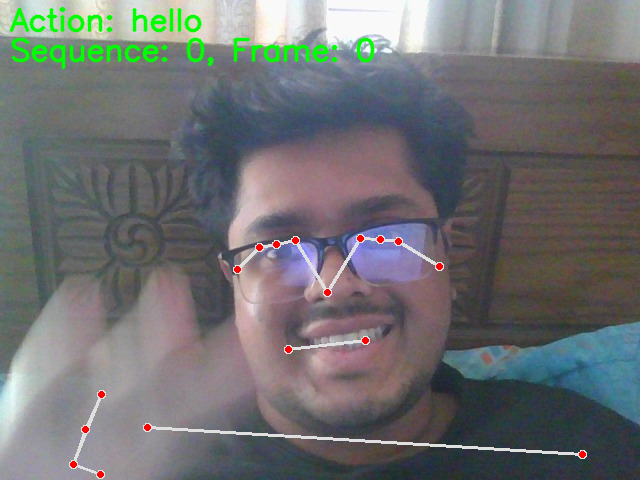

Press 'q' and Enter to stop, or just press Enter to continue.



<IPython.core.display.Javascript object>

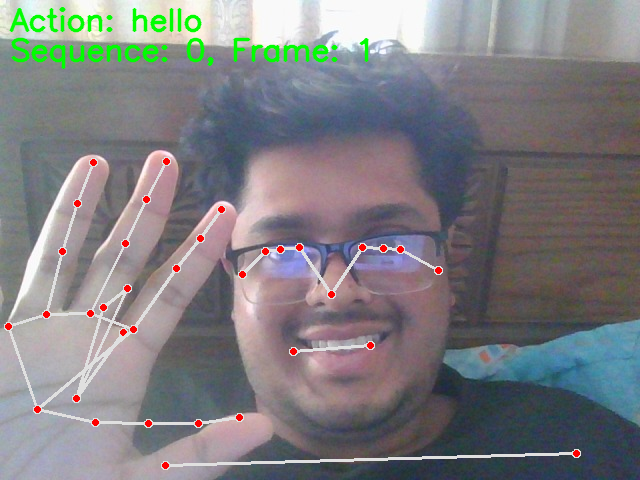

Press 'q' and Enter to stop, or just press Enter to continue.
q
Data collection stopped by user.


In [58]:
# Webcam Capture Function for Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import base64
import os
from matplotlib import pyplot as plt
import mediapipe as mp

# Capture a single frame using the webcam in Colab
def take_photo():
    js = Javascript('''
        async function takePhoto() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const context = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(video);
            video.style.display = 'none';
            canvas.style.display = 'none';
            video.srcObject = stream;
            await video.play();

            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            context.drawImage(video, 0, 0, canvas.width, canvas.height);

            stream.getTracks().forEach(track => track.stop());
            const data = canvas.toDataURL('image/jpeg');
            return data;
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = base64.b64decode(data.split(',')[1])
    img = np.frombuffer(binary, dtype=np.uint8)
    return cv2.imdecode(img, cv2.IMREAD_COLOR)

# Mediapipe Setup
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

# Function to perform Mediapipe detection
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False
    results = model.process(image)  # Make predictions
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results

# Function to draw styled landmarks
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Function to extract keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, lh, rh])

# Data Collection Parameters
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

# Ensure Directories Exist
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

from google.colab.patches import cv2_imshow

# Add a global stop flag
stop_collection = False

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        if stop_collection:  # Check if user wants to stop
            break
        for sequence in range(no_sequences):
            if stop_collection:  # Check if user wants to stop
                break
            for frame_num in range(sequence_length):
                print(f'Collecting data for {action}, sequence {sequence}, frame {frame_num}')

                # Capture frame using the webcam
                frame = take_photo()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                # Display feedback
                cv2.putText(image, f'Action: {action}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.putText(image, f'Sequence: {sequence}, Frame: {frame_num}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2_imshow(image)

                # Save keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Manual stop
                print("Press 'q' and Enter to stop, or just press Enter to continue.")
                user_input = input().lower()
                if user_input == 'q':  # Stop data collection
                    print("Data collection stopped by user.")
                    stop_collection = True
                    break




## Preparing data for lables

In [59]:
# # Debugging Code
# for action in actions:
#     for sequence in range(no_sequences):
#         print(f"Processing action: {action}, sequence: {sequence}")
#         window = []
#         for frame_num in range(sequence_length):
#             npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
#             if os.path.exists(npy_path):
#                 res = np.load(npy_path)
#                 if res.shape != (1662,):  # Check if frame shape is incorrect
#                     print(f"Frame {frame_num} in {npy_path} has shape {res.shape}, expected (1662,).")
#             else:
#                 print(f"Frame {frame_num} missing in {npy_path}. Adding zero padding.")
#                 res = np.zeros(1662)
#             window.append(res)

#         # Check sequence length
#         if len(window) != sequence_length:
#             print(f"Sequence {sequence} for action {action} has length {len(window)}, expected {sequence_length}.")
#             if len(window) < sequence_length:
#                 for _ in range(sequence_length - len(window)):
#                     window.append(np.zeros(1662))
#             elif len(window) > sequence_length:
#                 window = window[:sequence_length]

#         sequences.append(window)
#         labels.append(label_map[action])

# # Convert to numpy arrays
# try:
#     X = np.array(sequences)
#     y = to_categorical(labels).astype(int)
#     print(f"Features shape: {X.shape}")
#     print(f"Labels shape: {y.shape}")
# except Exception as e:
#     print(f"Error converting to numpy arrays: {e}")


In [60]:
# Debugging Code
sequences, labels = [], []

for action in actions:
    for sequence in range(no_sequences):
        print(f"Processing action: {action}, sequence: {sequence}")
        window = []
        for frame_num in range(sequence_length):
            npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
            if os.path.exists(npy_path):
                res = np.load(npy_path)
                # Check if the frame has the correct shape
                if res.shape != (1662,):
                    print(f"Frame {frame_num} in {npy_path} has incorrect shape {res.shape}, fixing.")
                    res = np.zeros(1662)  # Replace with zeros if shape is incorrect
            else:
                print(f"Frame {frame_num} missing in {npy_path}. Adding zero padding.")
                res = np.zeros(1662)  # Pad missing frames with zeros
            window.append(res)

        # Ensure the sequence length is consistent
        if len(window) != sequence_length:
            print(f"Sequence {sequence} for action {action} has incorrect length {len(window)}, fixing.")
            while len(window) < sequence_length:
                window.append(np.zeros(1662))  # Pad missing frames
            window = window[:sequence_length]  # Truncate excess frames

        # Append the fixed sequence
        sequences.append(window)
        labels.append(label_map[action])

# Final Check: Ensure all sequences are consistent
try:
    X = np.array(sequences)  # Convert to numpy array
    y = to_categorical(labels).astype(int)  # Convert labels to one-hot encoding
    print(f"Features shape: {X.shape}")
    print(f"Labels shape: {y.shape}")
except Exception as e:
    print(f"Error converting to numpy arrays: {e}")


Processing action: hello, sequence: 0
Frame 0 in MP_Data/hello/0/0.npy has incorrect shape (258,), fixing.
Frame 1 in MP_Data/hello/0/1.npy has incorrect shape (258,), fixing.
Frame 2 in MP_Data/hello/0/2.npy has incorrect shape (258,), fixing.
Frame 3 in MP_Data/hello/0/3.npy has incorrect shape (258,), fixing.
Frame 4 in MP_Data/hello/0/4.npy has incorrect shape (258,), fixing.
Frame 5 in MP_Data/hello/0/5.npy has incorrect shape (258,), fixing.
Frame 6 in MP_Data/hello/0/6.npy has incorrect shape (258,), fixing.
Frame 7 in MP_Data/hello/0/7.npy has incorrect shape (258,), fixing.
Frame 8 in MP_Data/hello/0/8.npy has incorrect shape (258,), fixing.
Frame 9 in MP_Data/hello/0/9.npy has incorrect shape (258,), fixing.
Frame 10 in MP_Data/hello/0/10.npy has incorrect shape (258,), fixing.
Frame 11 in MP_Data/hello/0/11.npy has incorrect shape (258,), fixing.
Frame 12 in MP_Data/hello/0/12.npy has incorrect shape (258,), fixing.
Frame 13 in MP_Data/hello/0/13.npy has incorrect shape (258

In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming X and y have already been defined
try:
    X = np.array(sequences)  # Convert sequences to a numpy array
    y = to_categorical(labels).astype(int)  # Convert labels to one-hot encoding
    print(f"Features shape: {X.shape}")  # Example: (90, 30, 1662)
    print(f"Labels shape: {y.shape}")  # Example: (90, 3)
except Exception as e:
    print(f"Error converting to numpy arrays: {e}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Debugging: Print shapes to confirm
print(f"X_train shape: {X_train.shape}")  # Example: (85, 30, 1662)
print(f"X_test shape: {X_test.shape}")    # Example: (5, 30, 1662)
print(f"y_train shape: {y_train.shape}")  # Example: (85, 3)
print(f"y_test shape: {y_test.shape}")    # Example: (5, 3)


Features shape: (90, 30, 1662)
Labels shape: (90, 3)
X_train shape: (85, 30, 1662)
X_test shape: (5, 30, 1662)
y_train shape: (85, 3)
y_test shape: (5, 3)


## Build LSTM neural network

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

# Set up TensorBoard for monitoring
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length, 1662)),
    LSTM(128, return_sequences=True, activation='relu'),
    LSTM(64, return_sequences=False, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model with validation split and callbacks
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,            # Start with 100 epochs
    batch_size=32,         # Use a batch size of 32
    callbacks=[tb_callback, early_stopping]
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - categorical_accuracy: 0.3263 - loss: 1.0986 - val_categorical_accuracy: 0.1765 - val_loss: 1.0990
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.3830 - loss: 1.0985 - val_categorical_accuracy: 0.1765 - val_loss: 1.0992
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3713 - loss: 1.0985 - val_categorical_accuracy: 0.1765 - val_loss: 1.0995
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.3518 - loss: 1.0985 - val_categorical_accuracy: 0.1765 - val_loss: 1.0997
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3674 - loss: 1.0984 - val_categorical_accuracy: 0.1765 - val_loss: 1.1001
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3518 - loss: 1.0985 - val_categorical_accuracy: 0.1765 - val_loss: 1.1005
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3909 - loss: 1.0980 - val_categorical_

In [63]:
print(f"X_train shape: {X_train.shape}")  # Should be (num_samples, sequence_length, 1662)
print(f"y_train shape: {y_train.shape}")  # Should be (num_samples, num_classes)


X_train shape: (85, 30, 1662)
y_train shape: (85, 3)


In [64]:
# Save the model to a file
model.save('action_recognition_model.h5')
print("Model saved as 'action_recognition_model.h5'")


Model saved as 'action_recognition_model.h5'


In [65]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Predict on the test set
yhat = model.predict(X_test)

# Convert predictions and true labels to integer format
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

# Confusion matrix
print("Confusion Matrix:")
print(multilabel_confusion_matrix(ytrue, yhat))

# Accuracy score
print("Accuracy Score:", accuracy_score(ytrue, yhat))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
Confusion Matrix:
[[[3 0]
  [2 0]]

 [[0 3]
  [0 2]]

 [[4 0]
  [1 0]]]
Accuracy Score: 0.4


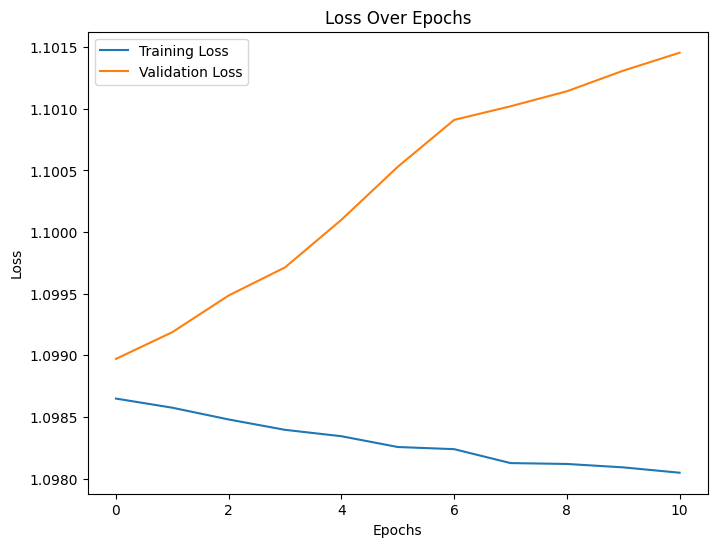

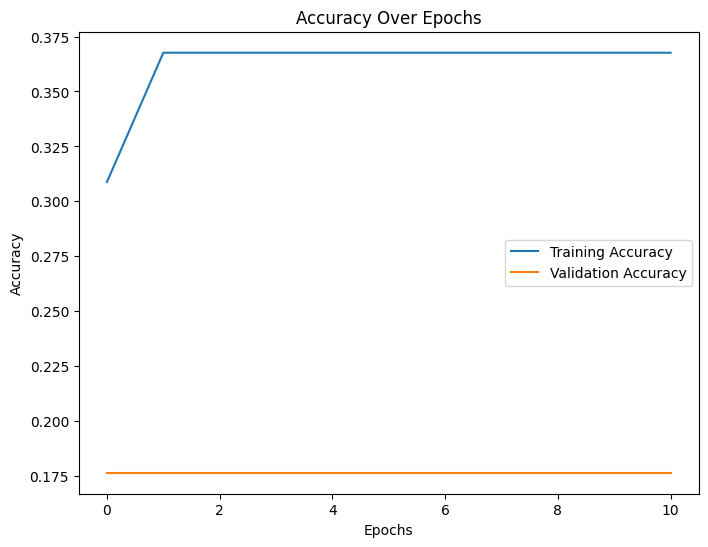

In [66]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [67]:
from scipy import stats

# Function to visualize action probabilities
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


<IPython.core.display.Javascript object>

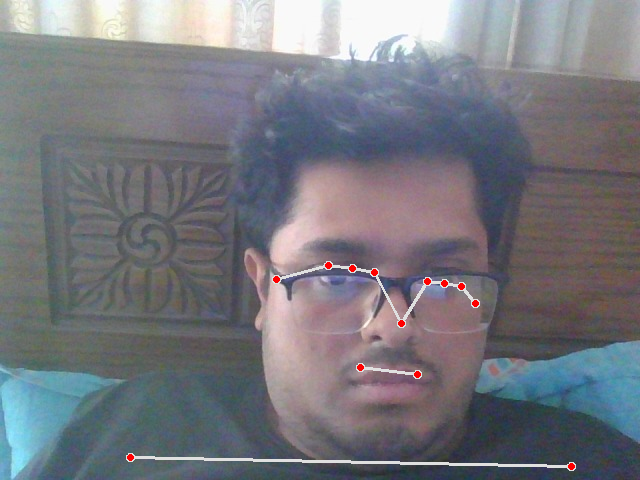

Press 'q' and Enter to stop.



<IPython.core.display.Javascript object>

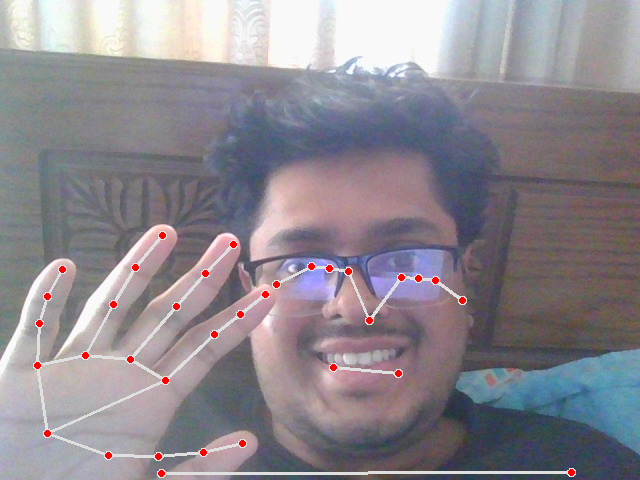

Press 'q' and Enter to stop.
q


In [68]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
sequence = []
sentence = []
predictions = []
threshold = 0.5

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        # Capture frame
        frame = take_photo()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        # Make predictions if enough frames are collected
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # Add to sentence if confidence is high
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            image = prob_viz(res, actions, image, colors)

        # Display the sentence on the frame
        cv2.putText(image, ' '.join(sentence), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2_imshow(image)

        # Break on manual stop
        print("Press 'q' and Enter to stop.")
        if input().lower() == 'q':
            break

